In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error

In [85]:
# read in data and subset for desired features 
dogs_df = pd.read_csv('dogs (3).csv')
dogs_df = dogs_df[['id', 'delta_time_minutes', 'age', 'gender', 'size', 'coat', 'primary_breed', 'primary_color', 'compatible_children', 'compatible_dogs', 'compatible_cats']]

# drop null values and reset index
dogs_df.dropna(inplace=True)
dogs_df.reset_index()
dogs_df

,id,delta_time_minutes,age,gender,size,coat,primary_breed,primary_color,compatible_children,compatible_dogs,compatible_cats
0,59313263,1213.833333,Adult,Male,Small,Short,Chihuahua,Yellow / Tan / Blond / Fawn,True,True,True
2,59313253,733.033333,Young,Male,Medium,Medium,Shetland Sheepdog / Sheltie,Merle (Blue),False,True,True
8,59313185,1269.450000,Young,Female,Large,Short,Anatolian Shepherd,Bicolor,True,True,True
10,59263354,1127.616667,Baby,Female,Medium,Short,Coonhound,Black,True,True,True
11,59313109,119.766667,Young,Male,Medium,Short,Beagle,"Tricolor (Brown, Black, & White)",True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4923,59262866,23.766667,Young,Female,Medium,Short,Pit Bull Terrier,Black,True,True,True
4927,59262859,872.433333,Young,Male,Medium,Long,Goldendoodle,Golden,True,True,True
4930,59262849,1288.566667,Baby,Female,Medium,Medium,German Shepherd Dog,Black,True,True,False
4931,59262848,1272.966667,Senior,Male,Large,Short,Black Labrador Retriever,Black,True,True,True


In [86]:
# make dummy columns and create a list of all columns
dogs_df_dummies = pd.get_dummies(data=dogs_df, 
                                 columns=['age', 'gender', 'size', 'coat', 'primary_breed','primary_color'])
print(list(dogs_df_dummies.columns))

['id', 'delta_time_minutes', 'compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 'age_Baby', 'age_Senior', 'age_Young', 'gender_Female', 'gender_Male', 'size_Extra Large', 'size_Large', 'size_Medium', 'size_Small', 'coat_Curly', 'coat_Hairless', 'coat_Long', 'coat_Medium', 'coat_Short', 'coat_Wire', 'primary_breed_Affenpinscher', 'primary_breed_Alaskan Malamute', 'primary_breed_American Bulldog', 'primary_breed_American Bully', 'primary_breed_American Eskimo Dog', 'primary_breed_American Staffordshire Terrier', 'primary_breed_Anatolian Shepherd', 'primary_breed_Aussiedoodle', 'primary_breed_Australian Cattle Dog / Blue Heeler', 'primary_breed_Australian Kelpie', 'primary_breed_Australian Shepherd', 'primary_breed_Australian Terrier', 'primary_breed_Basset Hound', 'primary_breed_Beagle', 'primary_breed_Belgian Shepherd / Malinois', 'primary_breed_Bernese Mountain Dog', 'primary_breed_Bichon Frise', 'primary_breed_Black Labrador Retriever', 'primary_breed_Black Mout

In [51]:
def random_forest_regress_default(x_feat_list, y_col, df): 
    """takes in dataframe and list of x features used to build random forest regressor predicting y column
    
        Args: 
            x_feat_list 
            
        Returns: 
            feat_importance_dict (dictionary)
            feat_importances (list)
    """

    # split into x and y data
    X = df.loc[:, x_feat_list].values
    y = df.loc[:, y_col].values

    # split into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    # initialize random forest regressor 
    regressor = RandomForestRegressor()

    # fit random forest regressor
    regressor.fit(X_train, y_train)

    # predict using regressor 
    y_pred = regressor.predict(X_test)
    
    # calculate accuracy scores 
    # oob_score = regressor.oob_score_
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # build dictionary of features and their importance to the model 
    feat_importances = regressor.feature_importances_
    feat_import_dict = {}
    for index, item in enumerate(feat_importances):
        feat = x_feat_list[index]
        feat_import_dict[feat] = item 
    
    residuals = y_test - y_pred
    
    return feat_importances, feat_import_dict, r2, mse, residuals

In [44]:
def random_forest_regress(x_feat_list, y_col, df): 
    """takes in dataframe and list of x features used to build random forest regressor predicting y column
    
        Args: 
            x_feat_list 
            
        Returns: 
            feat_importance_dict (dictionary)
            feat_importances (list)
    """

    # split into x and y data
    X = df.loc[:, x_feat_list].values
    y = df.loc[:, y_col].values

    # split into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    # initialize random forest regressor 
    regressor = RandomForestRegressor(n_estimators=100, 
                                     bootstrap=True, oob_score=True, random_state=42)

    # fit random forest regressor
    regressor.fit(X_train, y_train)

    # predict using regressor 
    y_pred = regressor.predict(X_test)
    
    # calculate accuracy scores 
    # oob_score = regressor.oob_score_
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # build dictionary of features and their importance to the model 
    feat_importances = regressor.feature_importances_
    feat_import_dict = {}
    for index, item in enumerate(feat_importances):
        feat = x_feat_list[index]
        feat_import_dict[feat] = item 
    
    residuals = y_test - y_pred
    
    return feat_importances, feat_import_dict, r2, mse, oob_score, residuals

In [45]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ TAKEN FROM PROF MATT HIGGER FALL 2022 DS2500
        plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')


### Test 1: All X Features

In [69]:
# use all x features and run first random forest regression 
x_feat_list = ['id', 'compatible_children', 'compatible_dogs', 'compatible_cats', 
               'age_Adult', 'age_Baby', 'age_Senior', 'age_Young', 'gender_Female', 'gender_Male', 
               'size_Extra Large', 'size_Large', 'size_Medium', 'size_Small', 'coat_Curly', 'coat_Hairless', 
               'coat_Long', 'coat_Medium', 'coat_Short', 'coat_Wire', 'primary_breed_Affenpinscher', 
               'primary_breed_Alaskan Malamute', 'primary_breed_American Bulldog', 
               'primary_breed_American Bully', 'primary_breed_American Eskimo Dog', 
               'primary_breed_American Staffordshire Terrier', 'primary_breed_Anatolian Shepherd', 
               'primary_breed_Aussiedoodle', 'primary_breed_Australian Cattle Dog / Blue Heeler', 
               'primary_breed_Australian Kelpie', 'primary_breed_Australian Shepherd', 
               'primary_breed_Australian Terrier', 'primary_breed_Basset Hound', 'primary_breed_Beagle', 
               'primary_breed_Belgian Shepherd / Malinois', 'primary_breed_Bernese Mountain Dog', 
               'primary_breed_Bichon Frise', 'primary_breed_Black Labrador Retriever', 
               'primary_breed_Black Mouth Cur', 'primary_breed_Bloodhound', 'primary_breed_Blue Lacy', 
               'primary_breed_Border Collie', 'primary_breed_Border Terrier', 'primary_breed_Boston Terrier', 
               'primary_breed_Boxer', 'primary_breed_Brussels Griffon', 'primary_breed_Cairn Terrier', 
               'primary_breed_Carolina Dog', 'primary_breed_Catahoula Leopard Dog', 'primary_breed_Cattle Dog', 
               'primary_breed_Cavalier King Charles Spaniel', 'primary_breed_Chihuahua', 
               'primary_breed_Chinese Crested Dog', 'primary_breed_Chiweenie', 'primary_breed_Chocolate Labrador Retriever', 
               'primary_breed_Chow Chow', 'primary_breed_Cocker Spaniel', 'primary_breed_Collie', 'primary_breed_Coonhound', 
               'primary_breed_Corgi', 'primary_breed_Dachshund', 'primary_breed_Dalmatian', 
               'primary_breed_Doberman Pinscher', 'primary_breed_Dogo Argentino', 'primary_breed_Dutch Shepherd', 
               'primary_breed_English Bulldog', 'primary_breed_English Coonhound', 'primary_breed_English Setter', 
               'primary_breed_English Shepherd', 'primary_breed_Entlebucher', 'primary_breed_Feist', 
               'primary_breed_Flat-Coated Retriever', 'primary_breed_Fox Terrier', 'primary_breed_Foxhound', 
               'primary_breed_French Bulldog', 'primary_breed_German Shepherd Dog', 'primary_breed_German Wirehaired Pointer', 
               'primary_breed_Golden Retriever', 'primary_breed_Goldendoodle', 'primary_breed_Great Dane', 
               'primary_breed_Great Pyrenees', 'primary_breed_Greyhound', 'primary_breed_Hound', 'primary_breed_Husky', 
               'primary_breed_Ibizan Hound', 'primary_breed_Icelandic Sheepdog', 'primary_breed_Irish Terrier', 
               'primary_breed_Italian Greyhound', 'primary_breed_Jack Russell Terrier', 'primary_breed_Japanese Chin', 
               'primary_breed_Labradoodle', 'primary_breed_Labrador Retriever', 'primary_breed_Lhasa Apso', 
               'primary_breed_Maltese', 'primary_breed_Maltipoo', 'primary_breed_Mastiff', 'primary_breed_Miniature Dachshund', 
               'primary_breed_Miniature Pinscher', 'primary_breed_Miniature Poodle', 'primary_breed_Miniature Schnauzer', 
               'primary_breed_Mixed Breed', 'primary_breed_Mountain Cur', 'primary_breed_Newfoundland Dog', 
               'primary_breed_Norfolk Terrier', 'primary_breed_Old English Sheepdog', 'primary_breed_Parson Russell Terrier', 
               'primary_breed_Patterdale Terrier / Fell Terrier', 'primary_breed_Pekingese', 'primary_breed_Pharaoh Hound', 
               'primary_breed_Pit Bull Terrier', 'primary_breed_Pointer', 'primary_breed_Pomeranian', 'primary_breed_Poodle', 
               'primary_breed_Pug', 'primary_breed_Rat Terrier', 'primary_breed_Retriever', 'primary_breed_Rhodesian Ridgeback', 
               'primary_breed_Rottweiler', 'primary_breed_Saluki', 'primary_breed_Schnauzer', 'primary_breed_Shar-Pei', 
               'primary_breed_Shepherd', 'primary_breed_Shetland Sheepdog / Sheltie', 'primary_breed_Shiba Inu', 
               'primary_breed_Shih Tzu', 'primary_breed_Siberian Husky', 'primary_breed_Spaniel', 
               'primary_breed_Staffordshire Bull Terrier', 'primary_breed_Standard Poodle', 'primary_breed_Terrier', 
               'primary_breed_Tibetan Terrier', 'primary_breed_Vizsla', 'primary_breed_Weimaraner', 'primary_breed_Whippet', 
               'primary_breed_White German Shepherd', 'primary_breed_Wirehaired Terrier', 'primary_breed_Xoloitzcuintli / Mexican Hairless', 
               'primary_breed_Yellow Labrador Retriever', 'primary_breed_Yorkshire Terrier', 'primary_color_Apricot / Beige', 
               'primary_color_Bicolor', 'primary_color_Black', 'primary_color_Brindle', 'primary_color_Brown / Chocolate', 
               'primary_color_Golden', 'primary_color_Gray / Blue / Silver', 'primary_color_Harlequin', 
               'primary_color_Merle (Blue)', 'primary_color_Merle (Red)', 'primary_color_Red / Chestnut / Orange', 
               'primary_color_Sable', 'primary_color_Tricolor (Brown, Black, & White)', 'primary_color_White / Cream', 
               'primary_color_Yellow / Tan / Blond / Fawn']

feature_importances, feat_import_dict, r2, mse, oob_score, residuals  = random_forest_regress(x_feat_list=x_feat_list, y_col='delta_time_minutes', df=dogs_df_dummies)

In [70]:
print(feat_import_dict)

{'id': 0.346322740436753, 'compatible_children': 0.005331946230668814, 'compatible_dogs': 0.005642469498742433, 'compatible_cats': 0.016919451661677874, 'age_Adult': 0.017571430544560722, 'age_Baby': 0.01710277757940663, 'age_Senior': 0.007630749963088963, 'age_Young': 0.01884976344641444, 'gender_Female': 0.013825593944711499, 'gender_Male': 0.014195523850870773, 'size_Extra Large': 0.0009106852026694113, 'size_Large': 0.014256174425172338, 'size_Medium': 0.013679533352711671, 'size_Small': 0.012712026726034123, 'coat_Curly': 0.0035990816103484537, 'coat_Hairless': 0.000720193893327061, 'coat_Long': 0.005116777670620911, 'coat_Medium': 0.017754683924198815, 'coat_Short': 0.012822130599641057, 'coat_Wire': 0.0030194854477099764, 'primary_breed_Affenpinscher': 0.0007038763128406027, 'primary_breed_Alaskan Malamute': 0.0, 'primary_breed_American Bulldog': 0.005838891677534448, 'primary_breed_American Bully': 0.003110445115072106, 'primary_breed_American Eskimo Dog': 0.001420509253901424,

In [72]:
print(f'''For original random forest regressor function:\nOOB Score: {oob_score}, R2: {r2}, MSE: {mse}''')

For original random forest regressor function:
OOB Score: 0.9999825662336511, R2: 0.08381054223893791, MSE: 226398.24298047228


In [73]:
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''For default random forest regressor function:\nR2: {r2}, MSE: {mse}''')

For default random forest regressor function:
R2: 0.06349438967772003, MSE: 228615.00108467988


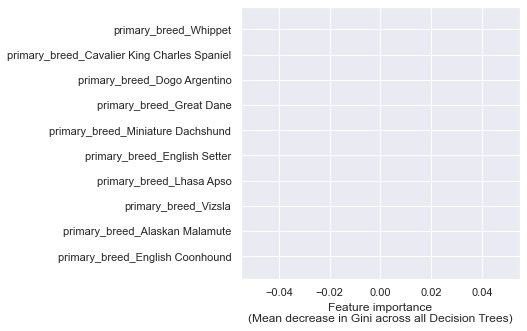

In [74]:
sns.set()
plot_feat_import(x_feat_list, feature_importances, limit=10)

### Test 2: X Data only looking at Breeds 

In [78]:
x_feat_list_breeds = ['primary_breed_Affenpinscher', 
               'primary_breed_Alaskan Malamute', 'primary_breed_American Bulldog', 
               'primary_breed_American Bully', 'primary_breed_American Eskimo Dog', 
               'primary_breed_American Staffordshire Terrier', 'primary_breed_Anatolian Shepherd', 
               'primary_breed_Aussiedoodle', 'primary_breed_Australian Cattle Dog / Blue Heeler', 
               'primary_breed_Australian Kelpie', 'primary_breed_Australian Shepherd', 
               'primary_breed_Australian Terrier', 'primary_breed_Basset Hound', 'primary_breed_Beagle', 
               'primary_breed_Belgian Shepherd / Malinois', 'primary_breed_Bernese Mountain Dog', 
               'primary_breed_Bichon Frise', 'primary_breed_Black Labrador Retriever', 
               'primary_breed_Black Mouth Cur', 'primary_breed_Bloodhound', 'primary_breed_Blue Lacy', 
               'primary_breed_Border Collie', 'primary_breed_Border Terrier', 'primary_breed_Boston Terrier', 
               'primary_breed_Boxer', 'primary_breed_Brussels Griffon', 'primary_breed_Cairn Terrier', 
               'primary_breed_Carolina Dog', 'primary_breed_Catahoula Leopard Dog', 'primary_breed_Cattle Dog', 
               'primary_breed_Cavalier King Charles Spaniel', 'primary_breed_Chihuahua', 
               'primary_breed_Chinese Crested Dog', 'primary_breed_Chiweenie', 'primary_breed_Chocolate Labrador Retriever', 
               'primary_breed_Chow Chow', 'primary_breed_Cocker Spaniel', 'primary_breed_Collie', 'primary_breed_Coonhound', 
               'primary_breed_Corgi', 'primary_breed_Dachshund', 'primary_breed_Dalmatian', 
               'primary_breed_Doberman Pinscher', 'primary_breed_Dogo Argentino', 'primary_breed_Dutch Shepherd', 
               'primary_breed_English Bulldog', 'primary_breed_English Coonhound', 'primary_breed_English Setter', 
               'primary_breed_English Shepherd', 'primary_breed_Entlebucher', 'primary_breed_Feist', 
               'primary_breed_Flat-Coated Retriever', 'primary_breed_Fox Terrier', 'primary_breed_Foxhound', 
               'primary_breed_French Bulldog', 'primary_breed_German Shepherd Dog', 'primary_breed_German Wirehaired Pointer', 
               'primary_breed_Golden Retriever', 'primary_breed_Goldendoodle', 'primary_breed_Great Dane', 
               'primary_breed_Great Pyrenees', 'primary_breed_Greyhound', 'primary_breed_Hound', 'primary_breed_Husky', 
               'primary_breed_Ibizan Hound', 'primary_breed_Icelandic Sheepdog', 'primary_breed_Irish Terrier', 
               'primary_breed_Italian Greyhound', 'primary_breed_Jack Russell Terrier', 'primary_breed_Japanese Chin', 
               'primary_breed_Labradoodle', 'primary_breed_Labrador Retriever', 'primary_breed_Lhasa Apso', 
               'primary_breed_Maltese', 'primary_breed_Maltipoo', 'primary_breed_Mastiff', 'primary_breed_Miniature Dachshund', 
               'primary_breed_Miniature Pinscher', 'primary_breed_Miniature Poodle', 'primary_breed_Miniature Schnauzer', 
               'primary_breed_Mixed Breed', 'primary_breed_Mountain Cur', 'primary_breed_Newfoundland Dog', 
               'primary_breed_Norfolk Terrier', 'primary_breed_Old English Sheepdog', 'primary_breed_Parson Russell Terrier', 
               'primary_breed_Patterdale Terrier / Fell Terrier', 'primary_breed_Pekingese', 'primary_breed_Pharaoh Hound', 
               'primary_breed_Pit Bull Terrier', 'primary_breed_Pointer', 'primary_breed_Pomeranian', 'primary_breed_Poodle', 
               'primary_breed_Pug', 'primary_breed_Rat Terrier', 'primary_breed_Retriever', 'primary_breed_Rhodesian Ridgeback', 
               'primary_breed_Rottweiler', 'primary_breed_Saluki', 'primary_breed_Schnauzer', 'primary_breed_Shar-Pei', 
               'primary_breed_Shepherd', 'primary_breed_Shetland Sheepdog / Sheltie', 'primary_breed_Shiba Inu', 
               'primary_breed_Shih Tzu', 'primary_breed_Siberian Husky', 'primary_breed_Spaniel', 
               'primary_breed_Staffordshire Bull Terrier', 'primary_breed_Standard Poodle', 'primary_breed_Terrier', 
               'primary_breed_Tibetan Terrier', 'primary_breed_Vizsla', 'primary_breed_Weimaraner', 'primary_breed_Whippet', 
               'primary_breed_White German Shepherd', 'primary_breed_Wirehaired Terrier', 'primary_breed_Xoloitzcuintli / Mexican Hairless', 
               'primary_breed_Yellow Labrador Retriever', 'primary_breed_Yorkshire Terrier']
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_breeds, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: -0.06363760466709767, MSE: 258434.95427009603


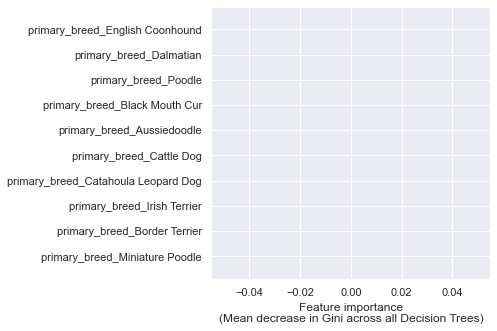

In [79]:
sns.set()
plot_feat_import(x_feat_list, feature_importances, limit=10)

### Test 3 - Only Looking at Colors

In [80]:
x_feat_list_colors = ['primary_color_Apricot / Beige', 
                       'primary_color_Bicolor', 'primary_color_Black', 'primary_color_Brindle', 'primary_color_Brown / Chocolate', 
                       'primary_color_Golden', 'primary_color_Gray / Blue / Silver', 'primary_color_Harlequin', 
                       'primary_color_Merle (Blue)', 'primary_color_Merle (Red)', 'primary_color_Red / Chestnut / Orange', 
                       'primary_color_Sable', 'primary_color_Tricolor (Brown, Black, & White)', 'primary_color_White / Cream', 
                       'primary_color_Yellow / Tan / Blond / Fawn']
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_colors, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: -0.023724121178696045, MSE: 249088.34618840925


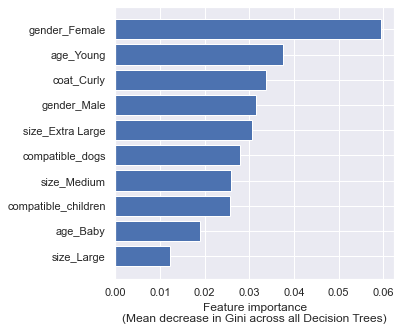

In [81]:
sns.set()
plot_feat_import(x_feat_list, feature_importances, limit=10)

### Test 4 - Only Looking at Features not Including Colors or Breeds

In [83]:
x_feat_list_nobreed_nocolor = ['id', 'compatible_children', 'compatible_dogs', 'compatible_cats', 
               'age_Adult', 'age_Baby', 'age_Senior', 'age_Young', 'gender_Female', 'gender_Male', 
               'size_Extra Large', 'size_Large', 'size_Medium', 'size_Small', 'coat_Curly', 'coat_Hairless', 
               'coat_Long', 'coat_Medium', 'coat_Short', 'coat_Wire']
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_nobreed_nocolor, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: 0.08153764408033615, MSE: 220596.1878963219


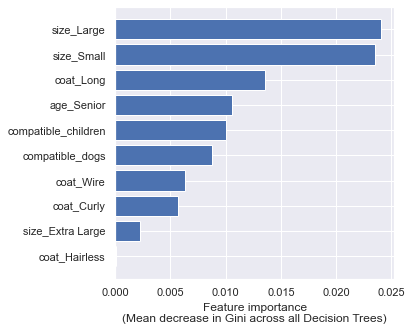

In [84]:
sns.set()
plot_feat_import(x_feat_list, feature_importances, limit=10)